In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [7]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [8]:
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

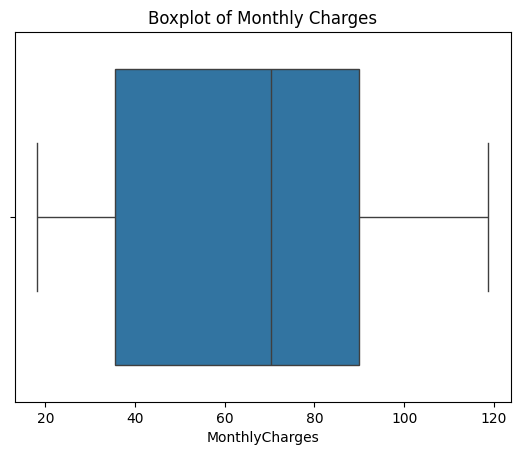

In [9]:
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
df = remove_outliers(df, 'MonthlyCharges')
df = remove_outliers(df, 'tenure')

In [12]:
print(f"Data shape after removing outliers: {df.shape}")

Data shape after removing outliers: (7043, 21)


In [17]:
df['MonthlyCharges_log'] = df['MonthlyCharges'].apply(lambda x: np.log1p(x))

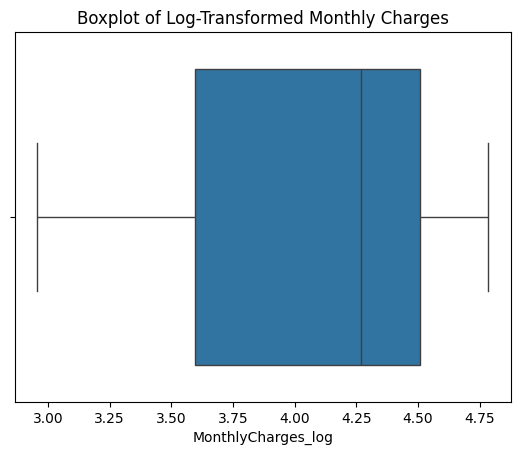

In [18]:
sns.boxplot(x=df['MonthlyCharges_log'])
plt.title('Boxplot of Log-Transformed Monthly Charges')
plt.show()

In [19]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'MonthlyCharges_log']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'MonthlyCharges_log']])

In [20]:
print(df.describe())

       SeniorCitizen        tenure  MonthlyCharges  MonthlyCharges_log
count    7043.000000  7.043000e+03    7.043000e+03        7.043000e+03
mean        0.162147 -2.421273e-17   -6.406285e-17       -2.264899e-16
std         0.368612  1.000071e+00    1.000071e+00        1.000071e+00
min         0.000000 -1.318165e+00   -1.545860e+00       -1.871335e+00
25%         0.000000 -9.516817e-01   -9.725399e-01       -7.686980e-01
50%         0.000000 -1.372744e-01    1.857327e-01        3.864748e-01
75%         0.000000  9.214551e-01    8.338335e-01        8.028709e-01
max         1.000000  1.613701e+00    1.794352e+00        1.278869e+00


In [21]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


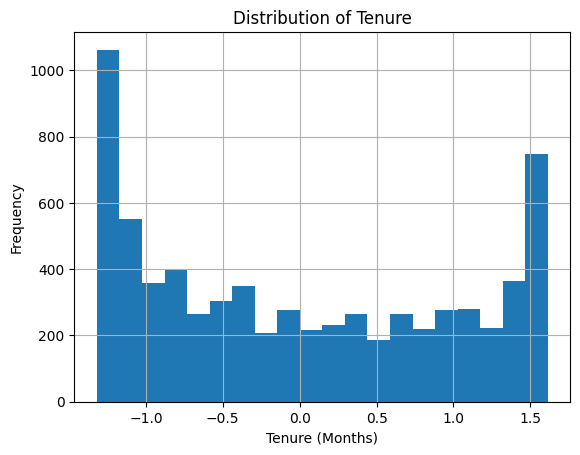

In [22]:
df['tenure'].hist(bins=20)
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

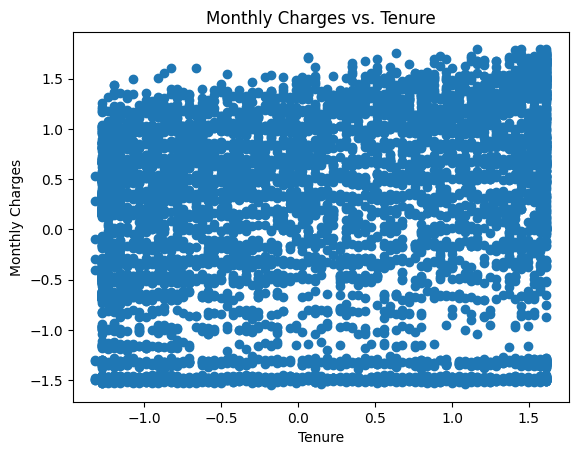

In [23]:
plt.scatter(df['tenure'], df['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Tenure')
plt.show()

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


In [25]:
corr = numeric_df.corr()

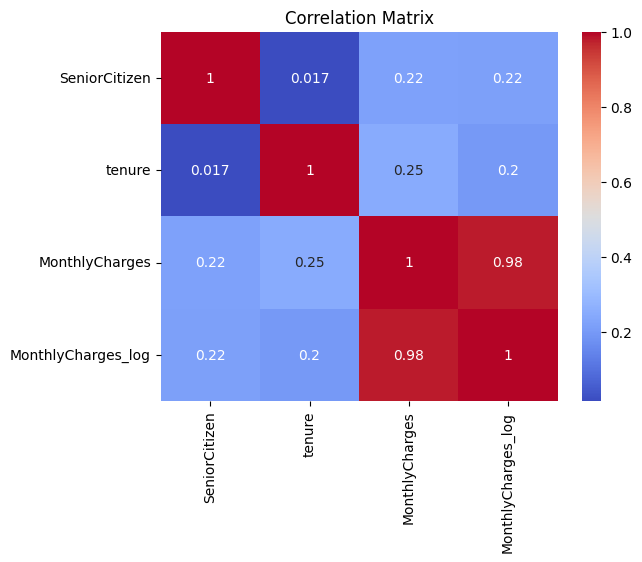

In [26]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

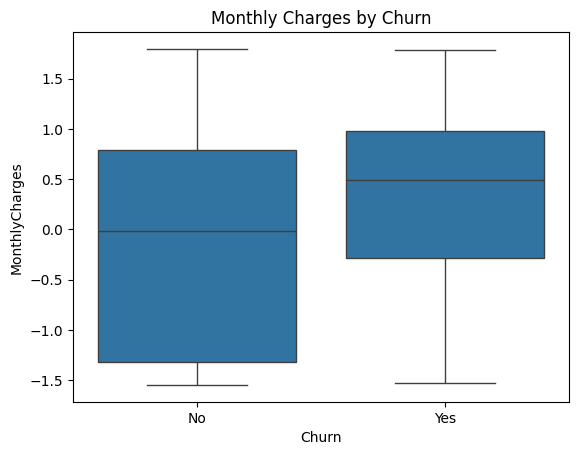

In [27]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

In [28]:
grouped_data = df.groupby('Churn')[['tenure', 'MonthlyCharges']].mean()
print(grouped_data)


         tenure  MonthlyCharges
Churn                          
No     0.211698       -0.116212
Yes   -0.586048        0.321712


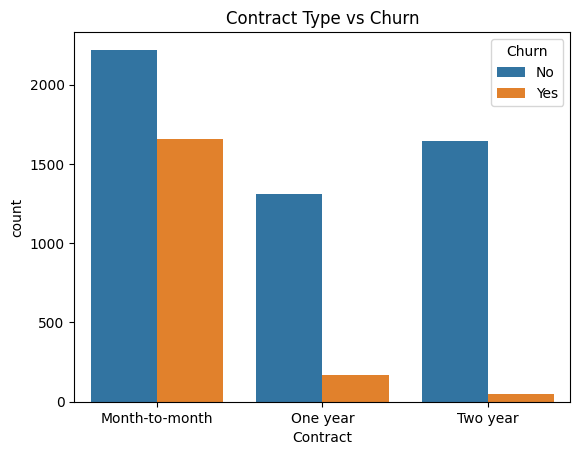

In [29]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()